# Clasificador de Plantas por Especie

### 1. Introducción
### Este proyecto tiene como objetivo construir un modelo de clasificación de plantas por especie a partir de imágenes, utilizando una red neuronal convolucional (CNN) entrenada en Google Colab.


In [9]:
# 2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# 3
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 4. Definición de rutas y parámetros
dataset_base_path = '/content/drive/MyDrive/BUAP Ciencia Datos/Modulo 6/archive'
train_path = os.path.join(dataset_base_path, 'train')
valid_path = os.path.join(dataset_base_path, 'valid')
test_path = os.path.join(dataset_base_path, 'test')

img_height, img_width = 150, 150
batch_size = 32

In [12]:
# 5. Preprocesamiento de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4284 images belonging to 12 classes.
Found 110 images belonging to 12 classes.
Found 110 images belonging to 12 classes.


In [13]:
# 6. Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# 7. Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.2356 - loss: 2.2170 - val_accuracy: 0.4364 - val_loss: 1.4106
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.5554 - loss: 1.2929 - val_accuracy: 0.5909 - val_loss: 1.0520
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.6925 - loss: 0.9292 - val_accuracy: 0.7727 - val_loss: 0.7398
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.7482 - loss: 0.7204 - val_accuracy: 0.7636 - val_loss: 0.8099
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.7929 - loss: 0.6174 - val_accuracy: 0.7727 - val_loss: 0.6821
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8304 - loss: 0.5080 - val_accuracy: 0.7727 - val_loss: 0.6393
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8542 - loss: 0.4306 - val_accuracy: 0.7818 - val_loss: 0.8674
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.8658 - loss: 0.3948 - val_accu

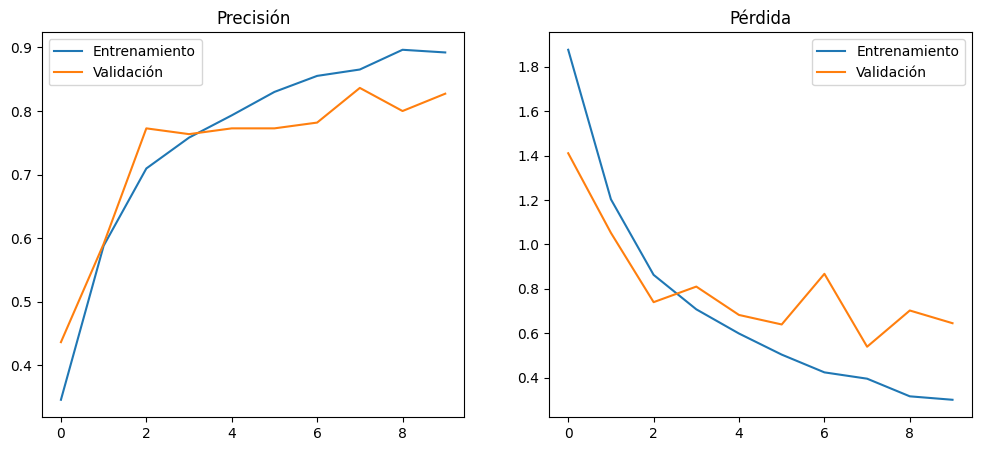

In [16]:
# 8. Evaluación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Entrenamiento')
plt.plot(val_acc, label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Pérdida')
plt.legend()

plt.show()

In [17]:
# 9. Evaluación final con el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.8361 - loss: 1.0352
Precisión en el conjunto de prueba: 0.83
Pérdida en el conjunto de prueba: 1.06


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


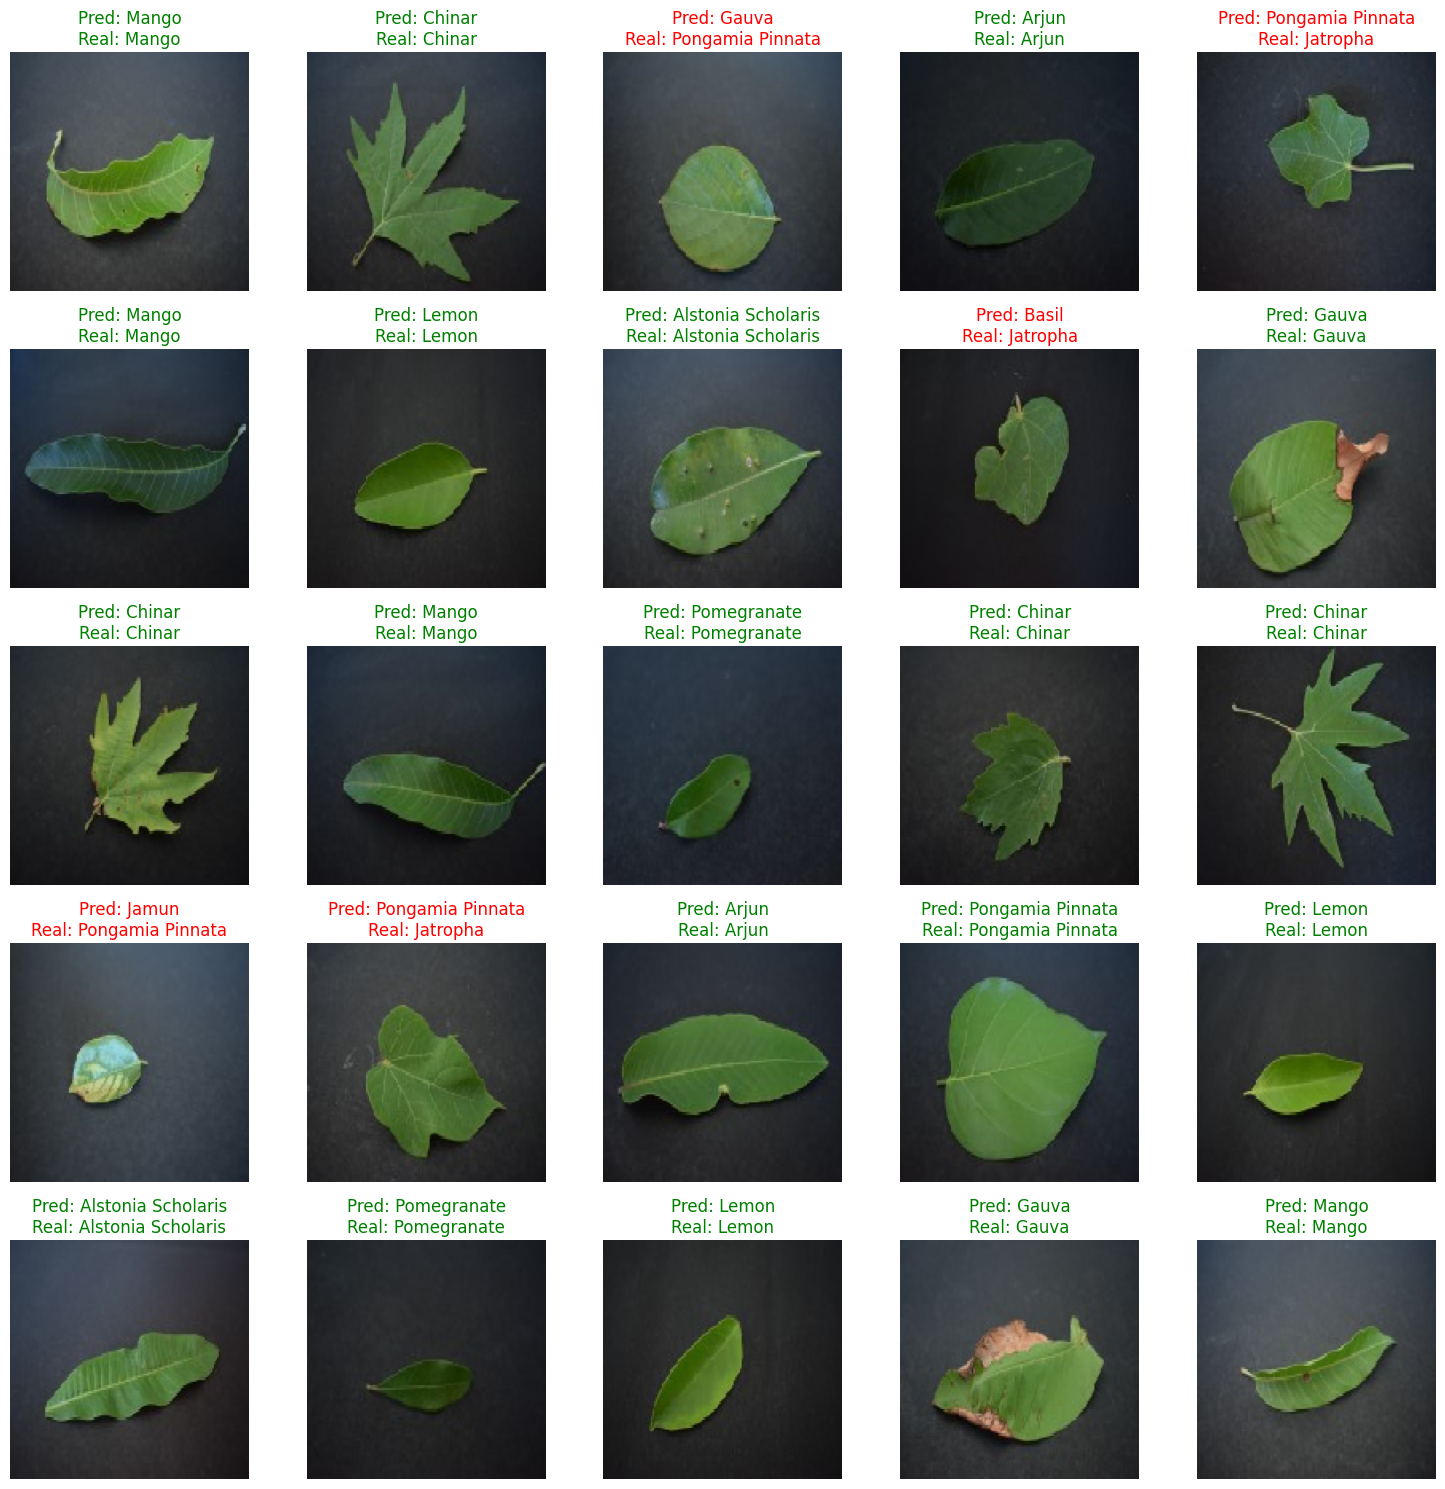

In [18]:
# 10. Predicciones visuales con el conjunto de validación
validation_generator.reset()
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)
class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(val_images[i])
    pred_name = class_names[predicted_labels[i]]
    real_name = class_names[true_labels[i]]
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f'Pred: {pred_name}\nReal: {real_name}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 11. Conclusión
### El modelo logra clasificar plantas por especie con una buena precisión, aunque veo recomendable explorar con un aumento de datos y técnicas de regularización para mejorar el rendimiento.